In [1]:
import regex as re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the enable word list in an array
with open('public/enable_word_list.txt') as f:
    word_list = f.read().splitlines()
print(len(word_list))

172820


In [3]:
# filter out any words that have any non A-Z or a-z characters using regex
word_list = [word for word in word_list if re.match('^[a-zA-Z]+$', word)]
print(len(word_list))

172820


In [4]:
# filter out any words that are present in the list at https://raw.githubusercontent.com/coffee-and-fun/google-profanity-words/main/data/list.txt
# first need to download the list to /tmp/profanity_list.txt
# Download:
!curl https://raw.githubusercontent.com/coffee-and-fun/google-profanity-words/main/data/list.txt > /tmp/profanity_list.txt
# Load:
with open('/tmp/profanity_list.txt') as f:
    profanity_list = f.read().splitlines()
print(len(profanity_list))

# filter out any words that are present in the profanity list
word_list = [word for word in word_list if word not in profanity_list]
print(len(word_list))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8384  100  8384    0     0  38995      0 --:--:-- --:--:-- --:--:-- 38995
958
172580


In [5]:
# now keep only the words in the list provided in https://raw.githubusercontent.com/first20hours/google-10000-english/master/google-10000-english-no-swears.txt
# first need to download the list to /tmp/google_list.txt
# Download:
!curl https://raw.githubusercontent.com/first20hours/google-10000-english/master/google-10000-english-no-swears.txt > /tmp/google_list.txt

# Load:
with open('/tmp/google_list.txt') as f:
    google_list = [s.strip() for s in f.read().splitlines()]
print(len(google_list))

# filter out any words that are not present in the longman list
word_list = [word for word in word_list if word in google_list]
print(len(word_list))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75153  100 75153    0     0   190k      0 --:--:-- --:--:-- --:--:--  190k
9894
8117


In [6]:
# remove any words that have already appeared in the game
already_appeared = ['sense', 'impose', 'form', 'barrier', 'writer', 'bend', 'sheep', 'speech', 'infant', 'equal', 'vision', 'diary', 'someone', 'simple', 'overall', 'extend', 'unique', 'beyond', 'defeat', 'cushion', 'loose', 'light', 'diagram', 'seek', 'brick', 'expect', 'swear', 'shocked', 'private', 'national', 'wash', 'resort', 'surgery', 'give', 'girl', 'actually', 'terror', 'teaching', 'amount', 'disk', 'foot', 'engineer', 'boring', 'collect', 'super', 'pleasure', 'hard', 'chap', 'beat', 'flower', 'stranger', 'servant', 'accuse', 'power', 'twist', 'easily', 'pitch', 'smile', 'flavour', 'purple', 'telly', 'propose']
word_list = [word for word in word_list if word not in already_appeared]
print(len(word_list))

8063


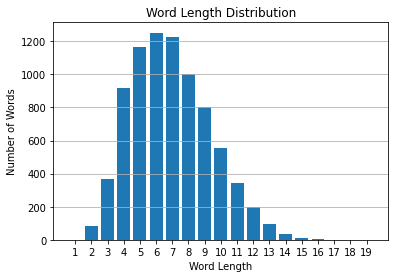

In [7]:
plt.bar(np.arange(1, 20), [len([word for word in word_list if len(word) == i]) for i in range(1, 20)])
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution')
plt.xticks(np.arange(1, 20))
plt.grid(axis='y')
plt.show()

In [8]:
# remove any words that are less than 5 characters long
word_list = [word for word in word_list if len(word) >= 5]
print(len(word_list))

6694


In [9]:
# remove any words that are more than 8 characters long
word_list = [word for word in word_list if len(word) <= 8] 
print(len(word_list))

4645


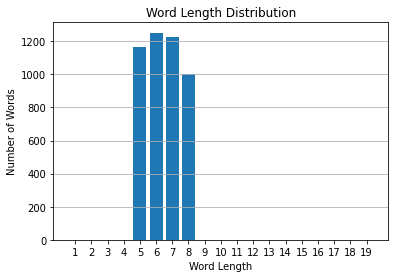

In [10]:
plt.bar(np.arange(1, 20), [len([word for word in word_list if len(word) == i]) for i in range(1, 20)])
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution')
plt.xticks(np.arange(1, 20))
plt.grid(axis='y')
plt.show()

In [11]:
# save the list to public/game_word_list.txt
with open('public/game_word_list.txt', 'w') as f:
    for word in word_list:
        f.write(word + '\n')